In [1]:
from lifelines.datasets import load_rossi
rossi = load_rossi()

In [13]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [15]:
# let's b-spline age
cph = CoxPHFitter().fit(rossi, "week", "arrest", formula="fin + bs(age, df=4) + wexp + mar + paro + prio")

In [21]:
# now we need to "extend" our data to plot it
# we'll plot age over it's observed range
age_range = np.linspace(rossi['age'].min(), rossi['age'].max(), 50)

# need to create a matrix of variables at their means, _except_ for age. 
x_bar = cph._central_values
df_varying_age = pd.concat([x_bar] * 50).reset_index(drop=True)
df_varying_age['age'] = age_range

df_varying_age.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,45.854167,0.263889,0.5,17.000000,0.877315,0.571759,0.122685,0.618056,2.983796
1,45.854167,0.263889,0.5,17.551020,0.877315,0.571759,0.122685,0.618056,2.983796
2,45.854167,0.263889,0.5,18.102041,0.877315,0.571759,0.122685,0.618056,2.983796
3,45.854167,0.263889,0.5,18.653061,0.877315,0.571759,0.122685,0.618056,2.983796
4,45.854167,0.263889,0.5,19.204082,0.877315,0.571759,0.122685,0.618056,2.983796


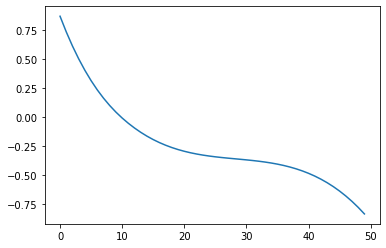

In [22]:
cph.predict_log_partial_hazard(df_varying_age).plot()

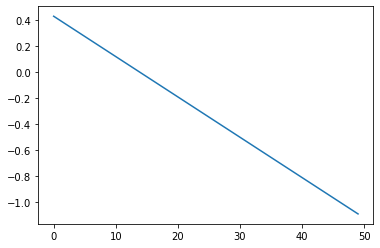

In [24]:
# compare to _not_ bspline-ing:
cph = CoxPHFitter().fit(rossi, "week", "arrest", formula="fin + age + wexp + mar + paro + prio")

age_range = np.linspace(rossi['age'].min(), rossi['age'].max(), 50)

# need to create a matrix of variables at their means, _except_ for age. 
x_bar = cph._central_values
df_varying_age = pd.concat([x_bar] * 50).reset_index(drop=True)
df_varying_age['age'] = age_range

cph.predict_log_partial_hazard(df_varying_age).plot()